In [1]:
%pylab inline
import datetime as dt
from davitpy.models import raydarn
import davitpy
import pandas
import numpy as np
import os

Re = davitpy.utils.Re

Populating the interactive namespace from numpy and matplotlib


In [2]:
sTime = dt.datetime(2012, 9, 20, 0, 0)
eTime = dt.datetime(2012, 9, 20, 0, 0)
UTstart = sTime.hour + sTime.minute/60.
UTend = eTime.hour + eTime.minute/60.
radar = 'sas'
beam = 9
freq = 15
elev = (8, 40, 0.1)


In [3]:
# Run the ray tracing for the specified period, radar, beam and frequency
# Use 4 threads (MPI) and output everything to /tmp

try:
    os.remove('/tmp/iscat.0.dat')
except:
    pass
try:
    os.remove('/tmp/gscat.0.dat')
except:
    pass

rto = raydarn.RtRun(sTime, eTime, 
    rCode=radar, beam=beam, freq=freq, 
    outDir='/tmp', nprocs=4,elev=elev)

In [4]:
# Read rays into memory
rto.readRays()

In [5]:
#rto.rays.paths[dt.datetime(2012, 9, 20, 7, 0)]

In [6]:
#rto.elev

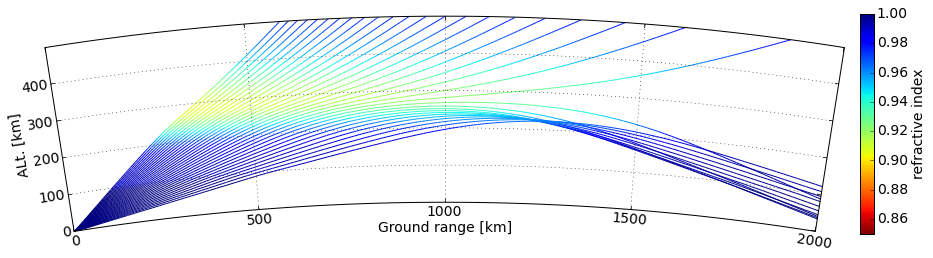

In [7]:
# Plot rays with refractive index color scale
# Plot 1 ray in 10 (1deg increment)
# Plot at start time
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.rays.plot(sTime, step=10, showrefract=True, nr_lim=[.85,1])

ax.grid()

In [8]:
# Read electron densities into memory
rto.readEdens()

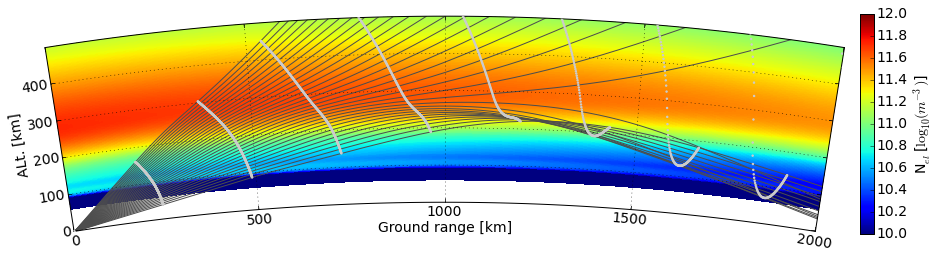

In [9]:
# Plot rays and electron densities together
# Plot at start time
# Plot range markers (every 250 km)
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.ionos.plot(sTime)
ax, aax, cbax = rto.rays.plot(sTime, 
    step=10, ax=ax, aax=aax)
rto.rays.showRange()

ax.grid()

In [10]:
# Read ionospheric and ground scatter into memory
rto.readScatter()

In [11]:
# rto.rays.writeToAscii('/home/davitpy/Desktop/rays.txt')

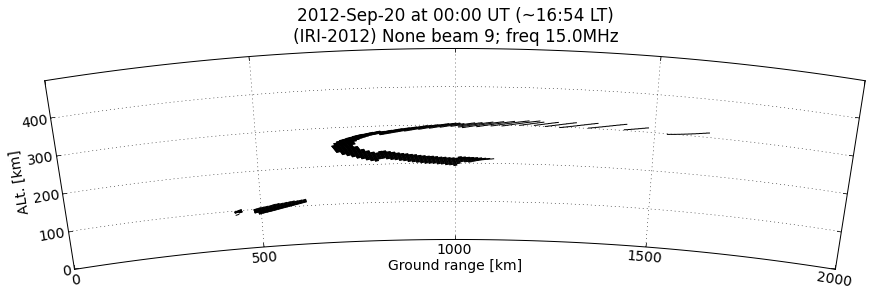

In [12]:
# Plot ionospheric and ground scatter together
# Plot at start time
# Plot relative strength of ionospheric scatter
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cax = rto.scatter.plot(sTime, title=True, weighted=False)

ax.grid()

In [13]:
#rto.scatter.isc

In [14]:
kt = rto.scatter.isc.keys()[0]
kb = rto.scatter.isc[kt].keys()[0]


In [15]:
dict_list = []
for kt in rto.scatter.isc.keys():
    for kb in rto.scatter.isc[kt].keys():
        elv_dict = rto.scatter.isc[kt][kb]
        for key,value in elv_dict.items():
            for ii in range(value['nstp']):
                tmp_dict = {'time':kt,'beam':kb,'elv_init':key,'radar':radar}
                for param,param_val in value.items():
                    if param == 'nstp': continue
                    tmp_dict[param] = param_val[ii]
                dict_list.append(tmp_dict)

In [16]:
df = pandas.DataFrame(dict_list)

In [17]:
#This code creates an additional dictionary list and DataFrame that identifies the elevation
#angles of all rays that are reflected by the ionosphere and backscattered by the ground.
#Knowledge of the highest elevation angle ground-backscattered ray greatly simplifies the 
#estimation of the refractive indices and great-circle distances to the scatter volumes.
#Currently the DataFrame does not include the great circle distance of the ground scatter.
#This will be an important addition and should be relatively easy to do, especially if the
# code is extended to estimate 1 1/2 hop scatter modes.

dict_list_gs = []
for kt in rto.scatter.gsc.keys():
    for kb in rto.scatter.gsc[kt].keys():
        elv_dict_gs = rto.scatter.gsc[kt][kb]
        for key,value in elv_dict_gs.items():
            tmp_dict_gs = {'time':kt, 'beam':kb, 'elv_init':key, 'radar':radar}
            dict_list_gs.append(tmp_dict_gs)
                             

In [18]:
dgs = pandas.DataFrame(dict_list_gs)

In [19]:
#The two-parameter analysis runs from the highest elevation-angle ray that detects scatter to the
#lowest. To accomplish this, both the df and dgs DataFrames need to be re-sorted and reindexed to run
#from high to low elevation angles. The re-sorted rays can be slassified into three groups.
#Group 1:Rays that refract sufficiently to be backscattered and then quickly penetrate the ionosphere.
#Group 2: Rays that backscatter below the peak of the F-region and again above the peak of the F-layer
#after which they penetrate the ionosphere. Group 3: Rays that backscatter below the peak of the F-layer
#and then are reflected by the ionosphere. Each group is processed by its associated phase of the
#analysis.

dgs.sort('elv_init', ascending=False, inplace=True)

In [20]:
dgs.reset_index(drop=True, inplace=True)

In [21]:
dgs.head(64)

,beam,elv_init,radar,time
0,9,18.1,sas,2012-09-20
1,9,18.0,sas,2012-09-20
2,9,17.9,sas,2012-09-20
3,9,17.8,sas,2012-09-20
4,9,17.7,sas,2012-09-20
5,9,17.6,sas,2012-09-20
6,9,17.5,sas,2012-09-20
7,9,17.4,sas,2012-09-20
8,9,17.3,sas,2012-09-20
9,9,17.2,sas,2012-09-20


In [22]:
del df['w']

In [23]:
#The peak electron density of the F-region ionosphere undergoes significant variation 
#in the course of a day. This variation requires a minimum of two operating 
#frequencies: one for daytime operation and one for nighttime operation. A third
#intermediate frequency might also be desirable for the dawn and dusk transitions. One
#can assure similar propagagion conditions, if the ground scatter footprint of a 
# signal at a specific initial elevation angle remains at  a similiar great circle
#distance. The equations below are used to identify the local time of the UT time that
#is being processed. The minimum ionospheric electron density occurs 1-2 hours before 
#local dawn, while the maximum density occurs a few hours afer local noon.

hysteresis = 2.
df['Loc_time'] = (df['time'][0].hour + df['time'][0].minute/60. + df['lon']/15. - hysteresis) % 24.

In [24]:
df.describe()

,beam,elv_init,gran,h,lat,lon,nr,r,rel,th,Loc_time
count,1400,1400.000000,1400.000000,1400,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,9,14.979643,890064.285714,10000,58.665758,-100.402534,0.949703,6595651.842500,9.243515,0.129328,15.306498
std,0,4.777435,223896.538406,0,1.567333,1.633082,0.026101,61385.067161,1.416155,0.030997,0.108872
min,9,8.000000,445000.000000,10000,55.539890,-103.491966,0.915634,6457404.000000,4.648922,0.067603,15.100536
25%,9,9.800000,795000.000000,10000,57.861532,-101.252028,0.923781,6580210.375000,8.362615,0.113354,15.249865
50%,9,15.200000,865000.000000,10000,58.470219,-100.639194,0.949740,6598648.250000,9.160464,0.125411,15.290720
75%,9,19.700000,995000.000000,10000,59.555234,-99.520037,0.969351,6642298.500000,9.989197,0.147019,15.365331
max,9,21.700000,1815000.000000,10000,65.040771,-93.237373,0.998868,6686462.000000,13.214661,0.255538,15.784175


In [25]:
df['lgc_rt']=df['th'] * Re

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 14 columns):
beam        1400 non-null int64
elv_init    1400 non-null float64
gran        1400 non-null float64
h           1400 non-null float64
lat         1400 non-null float64
lon         1400 non-null float64
nr          1400 non-null float64
r           1400 non-null float64
radar       1400 non-null object
rel         1400 non-null float64
th          1400 non-null float64
time        1400 non-null datetime64[ns]
Loc_time    1400 non-null float64
lgc_rt      1400 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 164.1+ KB


In [27]:
df.head(64)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt
0,9,8.5,505000,10000,56.031715,-103.027855,0.996315,6461259.0,sas,11.970028,0.077346,2012-09-20,15.131476,492.769069
1,9,8.5,515000,10000,56.107906,-102.955505,0.994977,6462789.5,sas,11.668563,0.078854,2012-09-20,15.136300,502.376379
2,9,8.5,525000,10000,56.184055,-102.883049,0.993841,6464478.5,sas,11.402493,0.080361,2012-09-20,15.141130,511.977565
3,9,8.5,535000,10000,56.260159,-102.810486,0.993012,6466317.5,sas,11.212596,0.081867,2012-09-20,15.145968,521.572438
4,9,8.5,545000,10000,56.336231,-102.737816,0.992496,6468228.5,sas,11.113315,0.083372,2012-09-20,15.150812,531.160998
5,9,8.5,555000,10000,56.412258,-102.665024,0.992235,6470158.0,sas,11.092878,0.084876,2012-09-20,15.155665,540.743388
6,9,8.5,565000,10000,56.488255,-102.592125,0.992147,6472100.5,sas,11.130832,0.086379,2012-09-20,15.160525,550.319891
7,9,8.5,575000,10000,56.564209,-102.519127,0.992151,6474068.0,sas,11.200913,0.087881,2012-09-20,15.165392,559.890698
8,9,8.5,585000,10000,56.640110,-102.446014,0.992195,6476070.0,sas,11.285618,0.089383,2012-09-20,15.170266,569.455952
9,9,8.5,595000,10000,56.715977,-102.372795,0.992357,6478131.5,sas,11.399570,0.090883,2012-09-20,15.175147,579.015509


In [28]:
df['height']=df['r']/1000.-Re

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 15 columns):
beam        1400 non-null int64
elv_init    1400 non-null float64
gran        1400 non-null float64
h           1400 non-null float64
lat         1400 non-null float64
lon         1400 non-null float64
nr          1400 non-null float64
r           1400 non-null float64
radar       1400 non-null object
rel         1400 non-null float64
th          1400 non-null float64
time        1400 non-null datetime64[ns]
Loc_time    1400 non-null float64
lgc_rt      1400 non-null float64
height      1400 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 175.0+ KB


In [30]:
df['h_2p'] = np.sqrt(Re**2 + (df['gran']*1e-3)**2 + 2*(df['gran']*1e-3)*Re*np.sin(df['elv_init']*np.pi/180.)) - Re
df['h_2p'].describe()

count    1400.000000
mean      292.907431
std       125.286058
min        89.129757
25%       244.087386
50%       267.214245
75%       346.034566
max       785.960606
Name: h_2p, dtype: float64

In [31]:
#The minimum height of the peak of the F-region electron density profile occurs a few hours
#after local noon and the minimum height occurs a few hours before dawn. EUV photons emitted
#by the sun is the principal process for creation of the ionosphere and 3-body recombination
#is the principal process for its decay. THe third body in the reaction is a neutral atom. Since
#the neutral density of the upper atmosphere decreases with altitude, the ionosphere after sunset
#decays from the bottom up. This equation is used in the 2-parameter analysis to mirror the
#in height of the ionosphere over a day. The changes in virtual height affect the Earth-centered
#included by the group path and the initial elevation angle and ultimately impact the great-circle
#distance of the scattering volume. The expression below optimmizes the diurnal variation of the
#virtual height and great-circle distance.

tmp = []
for index,row in df.iterrows():
    h_2p_max = 450. + 50*np.cos(row['Loc_time']*np.pi/12.)  #use 2000 for pure 2p-method, 550 for modified 2p-method
    if row['h_2p'] > h_2p_max:
        row['h_2p'] = h_2p_max
    tmp.append(row)    
df = pandas.DataFrame(tmp)
del tmp
df['h_2p'].describe()


count    1400.000000
mean      278.098197
std        94.732685
min        89.129757
25%       244.087386
50%       267.214245
75%       346.034566
max       422.594554
Name: h_2p, dtype: float64

In [32]:
df['th_2p']  = np.arcsin((df['gran']*1e-3)*np.cos(df['elv_init']*np.pi/180.) / (Re + df['h_2p']))
df['lgc_2p'] = df['th_2p'] * Re 

In [33]:
df['nr_2p'] = np.zeros_like(df['th_2p'], dtype=np.float)
size = df['th_2p'].size
df['phase'] = np.zeros_like(df['beam'], dtype = np.int64)

In [34]:
#Calculate 2p lat/lon for each step.
df['lat_2p'], df['lon_2p'] = davitpy.utils.greatCircleMove(rto.site.geolat, rto.site.geolon, df['lgc_2p'], rto.azim[0])

#Calculate bearing of each step
lats_lons = zip(np.array(df['lat_2p']), np.array(df['lon_2p']))
bearing = []
for lat, lon in lats_lons:
    bearing.append((davitpy.utils.greatCircleAzm(lat,lon,rto.site.geolat,rto.site.geolon) + 180.) % 360.)

df['bearing'] = bearing

In [35]:
# INPUTS
itype = 2 # 1 for Geodetic coordinates (Spheroid) OR 2 for Geocentric (Sphere)
decimal_yr = davitpy.utils.dateToDecYear(sTime) # decimal year
igrf_alt = 350. + Re # altitude
stp = 5.
xlti, xltf, xltd = -90.,90.,stp # latitude start, stop, step
xlni, xlnf, xlnd = -180.,180.,stp # longitude start, stop, step
ifl = 0 # Main field
# Call fortran subroutine
#lat,lon,d,s,h,x,y,z,f = davitpy.models.igrf.igrf11(itype,decimal_yr,igrf_alt,ifl,xlti,xltf,xltd,xlni,xlnf,xlnd)

lats_lons = zip(np.array(df['lat_2p']), np.array(df['lon_2p']))
mag_field = []
for lat, lon in lats_lons:
    result =  davitpy.models.igrf.igrf11syn(0,decimal_yr,itype,igrf_alt,90.-lat,lon)
    mag_field.append(result)
df['bx'], df['by'], df['bz'], df['B'] = zip(*mag_field)

# "b_along_ray_path"
df['b_kx'] = np.cos(np.radians(df['bearing']))*df['bx'] + np.sin(np.radians(df['bearing']))*df['by']

#for b_comp in ['bx','by','bz','b_kx']:
#    df[b_comp] = df[b_comp]/df['B']
df['b_kx'] = df['b_kx']/df['B']
df['b_kz'] = df['bz']/df['B']
df['dip'] = np.degrees(np.arctan2(df['b_kz'],df['b_kx']))

#df['beta'] = 90. - np.degrees(df['th_2p']) - df['elv_init']
#df['rot'] = df['dip'] - df['beta']

In [36]:
mag_list = ['gran', 'lgc_2p','elv_init','nr','b_kx','b_kz','dip']

df[mag_list]


,gran,lgc_2p,elv_init,nr,b_kx,b_kz,dip
0,505000,492.684609,8.5,0.996315,0.183106,0.979871,79.415353
1,515000,502.286028,8.5,0.994977,0.182092,0.980054,79.474592
2,525000,511.880762,8.5,0.993841,0.181080,0.980236,79.533699
3,535000,521.468773,8.5,0.993012,0.180070,0.980416,79.592675
4,545000,531.050026,8.5,0.992496,0.179062,0.980595,79.651517
5,555000,540.624485,8.5,0.992235,0.178056,0.980772,79.710227
6,565000,550.192112,8.5,0.992147,0.177052,0.980947,79.768804
7,575000,559.752873,8.5,0.992151,0.176050,0.981122,79.827248
8,585000,569.306732,8.5,0.992195,0.175050,0.981294,79.885558
9,595000,578.853654,8.5,0.992357,0.174053,0.981466,79.943735


In [37]:
result

(7479.60560746727, 175.40997411305642, 49319.66532141162, 49883.91179647329)

In [38]:
df.sort(['elv_init', 'gran'], ascending=[False, True], inplace=True)
print size

1400


In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 30 columns):
beam        1400 non-null int64
elv_init    1400 non-null float64
gran        1400 non-null float64
h           1400 non-null float64
lat         1400 non-null float64
lon         1400 non-null float64
nr          1400 non-null float64
r           1400 non-null float64
radar       1400 non-null object
rel         1400 non-null float64
th          1400 non-null float64
time        1400 non-null datetime64[ns]
Loc_time    1400 non-null float64
lgc_rt      1400 non-null float64
height      1400 non-null float64
h_2p        1400 non-null float64
th_2p       1400 non-null float64
lgc_2p      1400 non-null float64
nr_2p       1400 non-null float64
phase       1400 non-null int64
lat_2p      1400 non-null float64
lon_2p      1400 non-null float64
bearing     1400 non-null float64
bx          1400 non-null float64
by          1400 non-null float64
bz          1400 non-null float64
B      

In [41]:
see = ['elv_init','gran', 'phase','height','h_2p', 'th', 'th_2p']
df[see].tail(80)

,elv_init,gran,phase,height,h_2p,th,th_2p
1320,8.3,555000,0,97.5530,103.451763,0.084944,0.084926
1321,8.3,565000,0,99.4630,105.736794,0.086448,0.086429
1322,8.3,575000,0,101.3690,108.036453,0.087952,0.087931
1323,8.3,585000,0,103.2920,110.350726,0.089455,0.089433
1324,8.3,595000,0,105.2460,112.679595,0.090957,0.090933
1325,8.3,605000,0,107.2535,115.023047,0.092458,0.092432
1326,8.3,615000,0,109.3430,117.381064,0.093958,0.093930
1327,8.3,625000,0,111.5190,119.753631,0.095458,0.095427
1328,8.3,1025000,0,195.2210,226.396258,0.154714,0.154349
1329,8.3,1035000,0,197.5770,229.350843,0.156179,0.155797


In [42]:
# Determine the "phase" of the analysis.
#   Phase 1: Radar rays with same initial elevation angle are typically spaced approx. 10 km apart
#            but always less than 50 km apart
#   Phase 2: Radar rays with same initial elevation angle are spaced greater than 50 km apart
#   Phase 3: Radar rays are ground scatter rays.

phase_nr  = np.zeros([len(df)],dtype=np.int)
gran_diff = df.gran.diff()
first     = (np.where(gran_diff > 50000)[0]).min()
phase_nr[:first] = 1

# Make all entries of the elevation angle where the transition occurs a phase 2.
tmp_elv_init = df['elv_init'].loc[first]
tf = np.array( df['elv_init'] == tmp_elv_init)
phase_nr[tf] = 2

max_elv_init_gs = dgs['elv_init'][0]
tf = np.array( df['elv_init'] < max_elv_init_gs )

phase_nr[tf] = 3
phase_nr[phase_nr == 0] = 2
df['phase'] = phase_nr

print df['elv_init'][0], df['elv_init'][first], max_elv_init_gs

21.7 20.4 18.1


In [43]:
def calc_nr(elv_init,th_2p,inclination_init):
    nr_2p = np.sin((90-elv_init-th_2p*180./np.pi)*np.pi/180.)/inclination_init
    return nr_2p

In [44]:
nr_2p = np.zeros([len(df)],dtype=np.float)
#nr_2p[0] = calc_nr(df['elv_init'][0], df['th_2p'][0])
for index, row in df.iterrows():
    inclination_init = np.sin(row['dip']*np.pi/180)             #(75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    if index == 0:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'],inclination_init)
        last_nr_2p = nr_2p[index]
        last_elv = row['elv_init']
    elif row['h_2p'] < 220. and row['phase'] != 3:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
    elif row['elv_init'] <  last_elv and row['phase'] == 1:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
        last_elv = row['elv_init']
    elif row['elv_init'] == last_elv and row['phase'] == 1:
        nr_2p[index] = last_nr_2p*inclination_init/np.sin(row['dip']*np.pi/180)
    elif row['elv_init'] <  last_elv and row['phase'] == 2:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
        last_elv = row['elv_init']
    elif row['elv_init'] == last_elv and row['phase'] == 2:
        nr_2p[index] = last_nr_2p*inclination_init/np.sin(row['dip']*np.pi/180)
    elif row['phase'] == 3:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)\
        *inclination_init/np.sin(row['dip']*np.pi/180)
    
df['nr_2p'] = nr_2p

In [45]:
nr_offset = df['nr'].mean() - df['nr_2p'].mean()
print nr_offset
df['nr_2p'] = df['nr_2p'] + nr_offset

0.0116078238548


In [46]:
lgc_offset = df['lgc_rt'].mean() - df['lgc_2p'].mean()
print lgc_offset
df['lgc_2p'] = df['lgc_2p'] + lgc_offset

3.41637097927


In [47]:
see = ['elv_init','gran', 'phase', 'lgc_rt','lgc_2p', 'nr','nr_2p', 'height', 'h_2p']
df[see].tail(-1100)

,elv_init,gran,phase,lgc_rt,lgc_2p,nr,nr_2p,height,h_2p
1100,9.4,995000,3,952.571286,953.532345,0.972254,0.972003,203.1985,235.841902
1101,9.4,1005000,3,961.863363,962.702010,0.971289,0.971434,205.5680,238.929720
1102,9.4,1015000,3,971.152403,971.863093,0.970346,0.970864,207.7945,242.031219
1103,9.4,1025000,3,980.438404,981.015568,0.969429,0.970295,209.8060,245.146378
1104,9.4,1035000,3,989.721557,990.159409,0.968540,0.969725,211.5420,248.275179
1105,9.4,1055000,3,1008.280648,1008.421089,0.966864,0.968584,214.0325,254.573626
1106,9.4,1065000,3,1017.556776,1017.538878,0.966080,0.968013,214.7980,257.743235
1107,9.3,495000,3,481.608475,484.933560,0.993727,1.000490,94.3760,98.462742
1108,9.3,505000,3,491.182178,494.500520,0.992857,0.999937,96.0855,100.826614
1109,9.3,515000,3,500.749235,504.060472,0.992335,0.999384,97.9770,103.205070


In [48]:
df['th_2p'].describe()

count    1400.000000
mean        0.128792
std         0.030846
min         0.067590
25%         0.112850
50%         0.124897
75%         0.146193
max         0.256149
Name: th_2p, dtype: float64

In [49]:
df['lgc_rt'].describe()

count    1400.000000
mean      823.947868
std       197.480714
min       430.701036
25%       722.178555
50%       798.991559
75%       936.661198
max      1628.034982
Name: lgc_rt, dtype: float64

In [50]:
df['lgc_2p'].describe()

count    1400.000000
mean      823.947868
std       196.521501
min       434.034805
25%       722.380800
50%       799.134449
75%       934.812535
max      1635.343693
Name: lgc_2p, dtype: float64

In [51]:
df['nr_2p'].describe()

count    1400.000000
mean        0.949703
std         0.028964
min         0.903119
25%         0.923373
50%         0.949451
75%         0.970117
max         1.005017
Name: nr_2p, dtype: float64

In [52]:
df['nr'].describe()

count    1400.000000
mean        0.949703
std         0.026101
min         0.915634
25%         0.923781
50%         0.949740
75%         0.969351
max         0.998868
Name: nr, dtype: float64

In [53]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR STANDARD METHOD

#df['hv_sm'] = np.zeros_like(df['gran'], dtype = np.float)
#hve = 115.
#hvf = 350.
#size=df['gran'].size
#print size
#for index in range(0, size-1):
    #gran_km = (df['gran'][index])/1000.
    #if gran_km < 600.:
        #df['hv_sm'][index] = hve
    #elif 800. > gran_km >= 600.:
        #df['hv_sm'][index] = (gran_km-600.)*(hvf-hve)/200. + hve
    #else:
        #df['hv_sm'][index] = hvf
#df['th_sm'] =np.arccos((Re**2.+(Re+ df['hv_sm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_sm'])))
#df['lgc_sm'] = df['th_sm'] * Re

In [54]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR CHISHAM METHOD

#df['hv_cm'] = np.zeros_like(df['gran'], dtype = np.float)
#size1 = df['gran'].size
#print size1
#for index1 in range(0, size1-1):
    #gran_km1 = (df['gran'][index1])/1000.
    #if gran_km1 < 790.:
        #df['hv_cm'][index1] = 108.974 + 0.0191721*gran_km1 + 6.6828*1e-5*gran_km1*gran_km1
    #else:
        #df['hv_cm'][index1] = 384.416 - 0.17864*gran_km1 + 1.81405*1e-4*gran_km1*gran_km1
        
#df['th_cm'] =np.arccos((Re**2.+(Re+ df['hv_cm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_cm'])))
#df['lgc_cm'] = df['th_cm'] * Re

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 30 columns):
beam        1400 non-null int64
elv_init    1400 non-null float64
gran        1400 non-null float64
h           1400 non-null float64
lat         1400 non-null float64
lon         1400 non-null float64
nr          1400 non-null float64
r           1400 non-null float64
radar       1400 non-null object
rel         1400 non-null float64
th          1400 non-null float64
time        1400 non-null datetime64[ns]
Loc_time    1400 non-null float64
lgc_rt      1400 non-null float64
height      1400 non-null float64
h_2p        1400 non-null float64
th_2p       1400 non-null float64
lgc_2p      1400 non-null float64
nr_2p       1400 non-null float64
phase       1400 non-null int64
lat_2p      1400 non-null float64
lon_2p      1400 non-null float64
bearing     1400 non-null float64
bx          1400 non-null float64
by          1400 non-null float64
bz          1400 non-null float64
B      

In [56]:
#CODE FOR DETERMINING LGC AND NR DIFFERENCES BETWEEN RAY TRACING AND 2P-METHOD
#DIFFERENCES IN LGC BETWEEN RAY TRACING AND STANDARD/CHSHAM METHODS ARE COMMENTED OUT

df['lgc_diff_2p'] = df['lgc_rt'] - df['lgc_2p']
#df['lgc_diff_sm'] = df['lgc_rt'] - df['lgc_sm']
#df['lgc_diff_cm'] = df['lgc_rt'] - df['lgc_cm']
df['nr_diff_2p'] = df['nr'] - df['nr_2p'] 

In [57]:
df.head(700)
#THE COMPLETED DF DATAFRAME BELOW SHOWS IN THE 5 RIGHT-HAND COLUMNS: LGC AND NR FROM THE 2P-ANALYSIS,
#THE PHASE OF THE ANALYSIS, AND THE DIFFERENCE IN RAY-TRACING AND 2-P DETERMINATIONS OF LGC AND NR. 


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,bearing,bx,by,bz,B,b_kx,b_kz,dip,lgc_diff_2p,nr_diff_2p
0,9,21.7,835000,10000,58.023186,-101.091034,0.915658,6645503.0,sas,10.171781,...,32.752157,8782.527677,836.734343,48896.016266,49685.544411,0.157771,0.984109,80.891917,1.623866,0.012539
1,9,21.7,845000,10000,58.091671,-101.022415,0.915634,6647286.0,sas,10.165960,...,32.816890,8749.296189,821.009721,48909.605219,49692.793476,0.156923,0.984239,80.941271,1.898136,0.012515
2,9,21.7,855000,10000,58.160122,-100.953674,0.915700,6649014.0,sas,10.189245,...,32.881803,8716.177456,805.286118,48923.007804,49699.908730,0.156076,0.984368,80.990481,2.181329,0.012581
3,9,21.6,815000,10000,57.890659,-101.223427,0.916225,6641177.0,sas,10.139767,...,32.628124,8846.777520,866.988940,48869.344557,49671.218827,0.159411,0.983856,80.796563,1.060241,0.010824
4,9,21.6,825000,10000,57.959232,-101.154961,0.915983,6643085.0,sas,10.067019,...,32.692586,8813.291238,851.244701,48883.311063,49678.736100,0.158556,0.983989,80.846250,1.315333,0.010582
5,9,21.6,835000,10000,58.027767,-101.086388,0.915826,6644934.0,sas,10.020469,...,32.757229,8779.916791,835.500805,48897.089001,49686.117913,0.157705,0.984120,80.895794,1.579463,0.010425
6,9,21.6,845000,10000,58.096294,-101.017700,0.915758,6646722.5,sas,10.000105,...,32.822052,8746.654698,819.757558,48910.679327,49693.364981,0.156855,0.984250,80.945195,1.852588,0.010357
7,9,21.6,855000,10000,58.164803,-100.948898,0.915777,6648447.0,sas,10.008833,...,32.887057,8713.505474,804.015264,48924.082997,49700.478019,0.156008,0.984379,80.994453,2.134759,0.010376
8,9,21.6,865000,10000,58.233295,-100.879982,0.915884,6650118.5,sas,10.043743,...,32.952244,8680.469626,788.274225,48937.300972,49707.457746,0.155163,0.984506,81.043568,2.425931,0.010483
9,9,21.6,875000,10000,58.301781,-100.810951,0.916072,6651741.5,sas,10.107757,...,33.017612,8647.547651,772.534744,48950.334212,49714.304881,0.154321,0.984633,81.092540,2.726014,0.010671


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 32 columns):
beam           1400 non-null int64
elv_init       1400 non-null float64
gran           1400 non-null float64
h              1400 non-null float64
lat            1400 non-null float64
lon            1400 non-null float64
nr             1400 non-null float64
r              1400 non-null float64
radar          1400 non-null object
rel            1400 non-null float64
th             1400 non-null float64
time           1400 non-null datetime64[ns]
Loc_time       1400 non-null float64
lgc_rt         1400 non-null float64
height         1400 non-null float64
h_2p           1400 non-null float64
th_2p          1400 non-null float64
lgc_2p         1400 non-null float64
nr_2p          1400 non-null float64
phase          1400 non-null int64
lat_2p         1400 non-null float64
lon_2p         1400 non-null float64
bearing        1400 non-null float64
bx             1400 non-null float64
by 

(-20, 20)

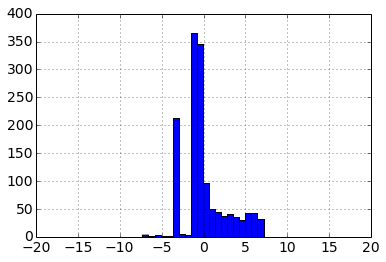

In [59]:
df['lgc_diff_2p'].hist(bins=20)
plt.xlim(-20, 20)


In [60]:
df['lgc_diff_2p'].describe()

count    1.400000e+03
mean    -6.480150e-14
std      2.616960e+00
min     -7.308711e+00
25%     -1.119878e+00
50%     -6.588980e-01
75%      7.419974e-01
max      7.158079e+00
Name: lgc_diff_2p, dtype: float64

In [61]:
#df['lgc_diff_sm'].hist(bins=20)
#plt.xlim(-200, 200)

In [62]:
df['h_2p'].describe()

count    1400.000000
mean      278.098197
std        94.732685
min        89.129757
25%       244.087386
50%       267.214245
75%       346.034566
max       422.594554
Name: h_2p, dtype: float64

In [63]:
#df['lgc_diff_cm'].hist(bins=20)
#plt.xlim(-200, 200)

In [64]:
#df['lgc_diff_cm'].describe()

(-0.2, 0.2)

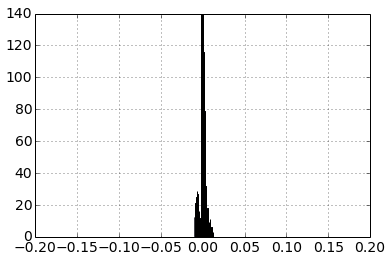

In [65]:
df['nr_diff_2p'].hist(bins=40)
plt.xlim(-0.2, 0.2)

In [66]:
df['nr_diff_2p'].describe()

count    1.400000e+03
mean    -5.963484e-17
std      3.618951e-03
min     -9.260406e-03
25%     -1.283426e-03
50%      1.094775e-04
75%      1.849456e-03
max      1.258114e-02
Name: nr_diff_2p, dtype: float64

In [67]:
home_dir = os.getenv('HOME')
df.to_csv(os.path.join(home_dir,'Desktop/data.csv'))

In [68]:
df['nr_2p'].describe()

count    1400.000000
mean        0.949703
std         0.028964
min         0.903119
25%         0.923373
50%         0.949451
75%         0.970117
max         1.005017
Name: nr_2p, dtype: float64

In [69]:
df['phase'].describe()

count    1400.000000
mean        2.450000
std         0.736324
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: phase, dtype: float64